# Conținut *Data Analysis*:
## [0. Introducere](#0)
## [1. Setul de date  *House Price*](#1)
## [2. Importul biblitecilor și datelor](#2)
## [3. Esența analizei datelor](#3)
## [4. Variabila etichetă](#4)
## [5. Tipul variabilelor](#5)
## [6. Datele lipsă](#6)
## [7. Variabile numerice](#7)
### [7.1. Variabile de timp](#71)
### [7.2. Variabile discrete](#72)
### [7.3. Variabile continue](#73)
#### [7.3.1. Tranformarea Yeo-Johnsonp](#731)
#### [7.3.2. Transformarea logaritmica](#732)
#### [7.3.3. Transformarea binară](#733)
## [8. Variabile categoriale](#8)
### [8.1. Numarul de valori: cardinalitatea](#81)
### [8.2. Variabile de calitate](#82)
### [8.3. Variabile cu valori rare](#83)


<a id='0'></a>
# 0. Introducere

În următoarele fișiere notebook, vom descrie implementarea fiecăruia dintre pașii necesari elaborării unui model Machine Learning.

Se va discuta despre:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obținerea predicțiilor / Scoring

În acest notebook se va aborda subiectul **Data Analysis**

<a id='1'></a>
# 1. Setul de date  *House Price*

Vom utiliza setul de date **house price** disponbil pe [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Vezi mai jos detaliile setului de date.

===================================================================================================

### Predicția Prețului de Vânzare a Caselor

Scopul proiectului este de a construi un model machine learning pentru a prezice prețul de vânzare al caselor pe baza diferitelor variabile explicative ce descriu aspecte ale caselor rezidențiale.


### De ce este atât de important? 

Predicting house prices is useful to identify fruitful investments or to determine whether the price advertised for a house is over or under-estimated.
Predicția prețurilor caselor este utilă pentru a identifica investițiile sau pentru a determina dacă prețul anunțat pentru o casă este supraestimat sau subestimat.


### Care este obiectivul modelului machine learning?

Ne propunem să minimizăm diferența dintre prețul real și prețul estimat de modelul nostru. Vom evalua performanța modelului cu:

1. eroare medie pătratică (mse - mean squared error)
2. rădăcina pătrată a erorii medii pătratice (rmse - root squared of the mean squared error)
3. r pătrat (r2 - r-squared).


### Cum se descarcă setul de date?

- Se accesează [Kaggle Website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

- Se logează **log in** (preventiv se crează un cont).

- Se descarcă fișierul **'train.csv'** și se salvează în folderul cu fișierul notebook curent.

- Se descarcă fișierul **'test.csv'** și se salvează în același folder.

<a id='2'></a>
# 2. Importul biblitecilor și datelor

In [1]:
# pentru gestionarea setului de date
import pandas as pd
import numpy as np

# pentru afișarea grafică
import matplotlib.pyplot as plt
import seaborn as sns

# pentru transforamrea yeo-johnson
import scipy.stats as stats

# pentru afișarea tutror coloanelor dataframe în notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# încărcarea datelor
data = pd.read_csv('train.csv')

# afișareanumarului de lini și coloane
print(data.shape)

# vizualizarea primelor 5 date ale setului
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# ștergera coloanei id
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

Setul de date conțiene 1460 de linii, adică, de case și 80 de coloane, adică variabile. 

79 de variabile sunt predinctive, adică caracteristici și o variabilă este varibaila etichetă (target): SalePrice

<a id='3'></a>
# 3. Esența analizei datelor

**Se vor analiza următoarele:**

1. Variabila etichetă
2. Tipul variabilelor (categoriale sau numerice)
3. Datele lipsă
4. Variabilele numierice
    - Discrete
    - Continue
    - Distribuții
    - Transformări
5. Variabile categoriale
    - Cardinalitatea
    - Variabile cu valori rare

<a id='4'></a>
# 4. Variabila etichetă

Se analizează distibuțiua variabilii etichetă

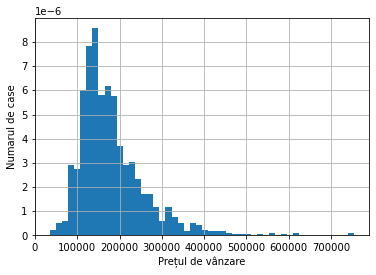

In [4]:
# histograma de evaluarea a distribuției etichetei

data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Numarul de case')
plt.xlabel('Prețul de vânzare')
plt.show()

Se observă că eticheta este continuă iar distribuția este deformată spre dreapta.

Se poate îmbunătăți distribuția valorilo cu o transformare matematică.

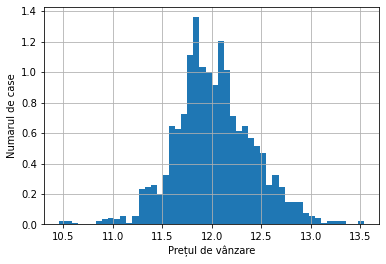

In [5]:
# transoframrea etichetei utilizând logaritmul

np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Numarul de case')
plt.xlabel('Prețul de vânzare')
plt.show()

Acum distribuția este mai apropiată de distribuția Gauss.

<a id='5'></a>
# 5. Tipul variabilelor

Next, let's identify the categorical and numerical variables

In [6]:
# vizualizarea informației despre variabilele setului de date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# Selectarea variabilelor categoriale prin intermediul tipului de date *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'object']

# MSSubClass de deasemenea de tip categorial deși area valoare numerica
# (esența variabileor poate fi găsită în fișierul data_description.txt
# disponibil pe Kaggle, pe aceași pagină de unde au fost descăracate datel)

# Adăugarea MSSubClass în lista variabilor categoriale
cat_vars = cat_vars + ['MSSubClass']

# Numarul variabilelor categoriale
len(cat_vars)

44

In [8]:
# castingul tuturor variabilelor categoriale în tip *object*
data[cat_vars] = data[cat_vars].astype('object')

In [9]:
# selectarea variabielor numerice

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'SalePrice'
]

# numarul variabilelor numerice
len(num_vars)

35

<a id='6'></a>
# 6. Datele lipsă

Determinarea variabilelor setului de date ce contin date lipsă

In [10]:
# creaerea unei liste a variabilelor ce contin date lipsă
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# deteminarea procentajului de date lipsă (exprimat zecimal)
# și afișarea în ordine descrescătoare

data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Setul de date conține câteva variabile (primele 4 în top) ce au o proporție foarete mare de date lipsă și alte variabile cu un procentaj mic de date lipsă.

Pentru a crea modelul machine learning pe baza acestui set este necesară excluderea/completarea datelor lipsă.

De asemenea se poare reprezenta grafic procentajul datelor lipsă 

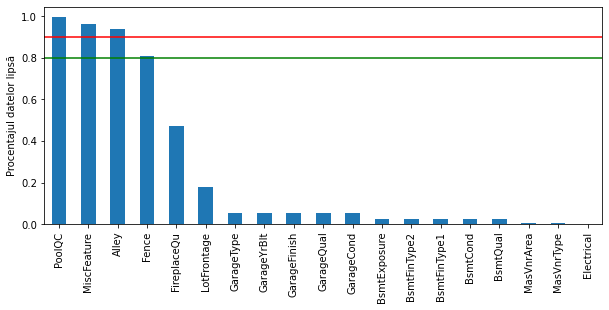

In [11]:
# afisarea grafica

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Procentajul datelor lipsă')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [12]:
# se detemină care dintre variabilele cu date lipsă sunt numerice și care categoriale

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Numarul variabilelor categoriale cu lipsuri: ', len(cat_na))
print('Numarul variabilelor numerice cu lipsuri: ', len(num_na))

Numarul variabilelor categoriale cu lipsuri:  16
Numarul variabilelor numerice cu lipsuri:  3


In [13]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [14]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Se evaluează prețul caselor a acelor date unde informația este lipsă. Evaluarea se va efectua pentru fiecare variabila de aceea se va cea o functie analyse_nan_value().

In [15]:
def analyse_na_value(df, var):

    # se realizaează o copie a dataframe pentru a nu se realiza modificari în dataframe-ul initial
    df = df.copy()

    # se substituie lipsurile cu valoarea 1 și datele prezente cu 0
    df[var] = np.where(df[var].isnull(), 1, 0)

    # Se compara valoarea medie SalePrice a datelor cu lisuri vs date fără lipsuri
    # vs the observations where data is available

    # se detemina pretul mediu și deviația standard pentru grupurile 1 și 0 
    # și rezultatele se includ intr-un set temporar
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    print(tmp)

    # se afiseaza graficul de tip bar
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="SalePrice", color='green')

    plt.show()

                      mean           std
LotFrontage                             
0            180770.480433  83389.519866
1            181620.073359  57841.775706


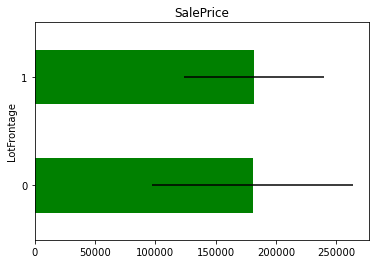

                mean           std
Alley                             
0      142845.912088  42867.137343
1      183452.131483  80667.145180


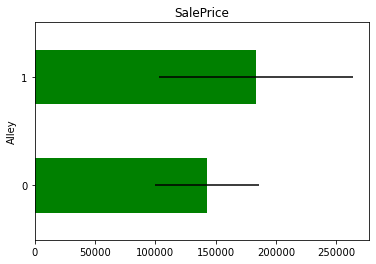

                     mean           std
MasVnrType                             
0           180615.063361  79285.541485
1           236484.250000  93964.474968


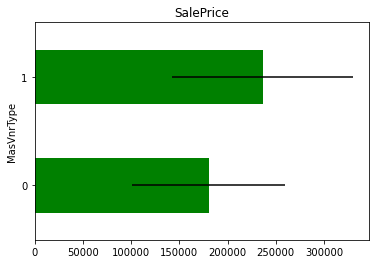

                     mean           std
MasVnrArea                             
0           180615.063361  79285.541485
1           236484.250000  93964.474968


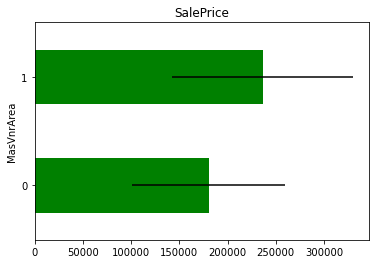

                   mean           std
BsmtQual                             
0         182878.277583  79387.526888
1         105652.891892  29278.694797


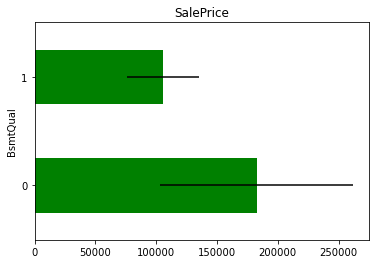

                   mean           std
BsmtCond                             
0         182878.277583  79387.526888
1         105652.891892  29278.694797


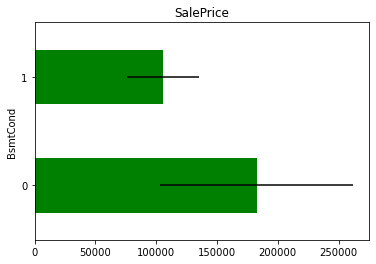

                       mean           std
BsmtExposure                             
0             182871.511252  79415.045187
1             107938.342105  32133.440664


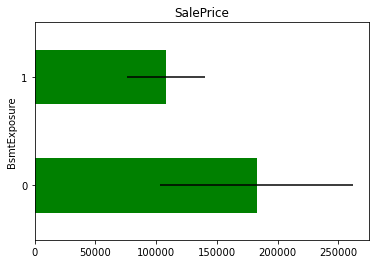

                       mean           std
BsmtFinType1                             
0             182878.277583  79387.526888
1             105652.891892  29278.694797


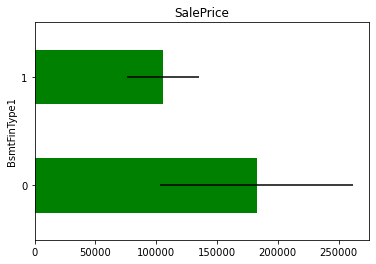

                       mean           std
BsmtFinType2                             
0             182807.165260  79370.104421
1             110346.236842  40879.307312


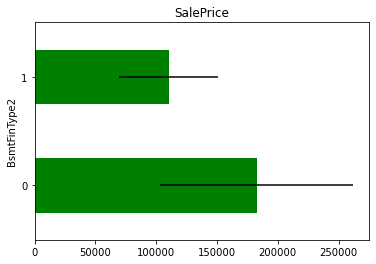

                     mean           std
Electrical                             
0           180930.394791  79468.964025
1           167500.000000           NaN


C:\Users\Nicolaev\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Nicolaev\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


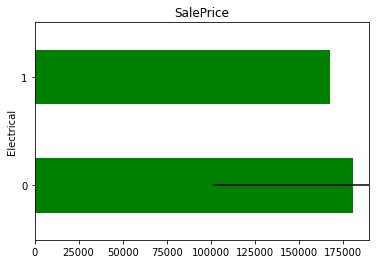

                      mean           std
FireplaceQu                             
0            216397.692208  86843.901262
1            141331.482609  44389.786884


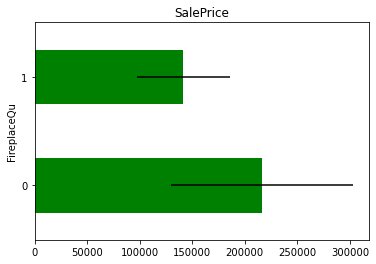

                     mean           std
GarageType                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


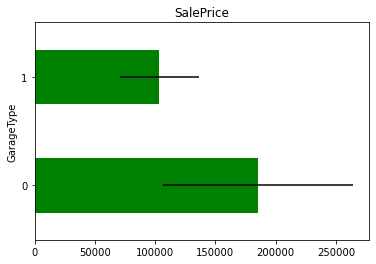

                      mean           std
GarageYrBlt                             
0            185479.511240  79023.890600
1            103317.283951  32815.023389


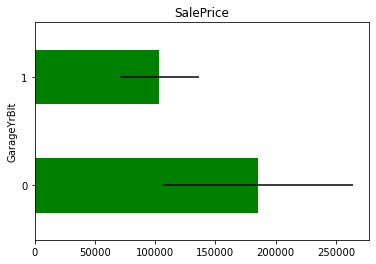

                       mean           std
GarageFinish                             
0             185479.511240  79023.890600
1             103317.283951  32815.023389


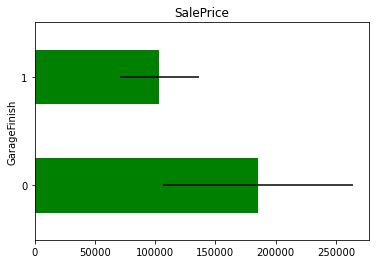

                     mean           std
GarageQual                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


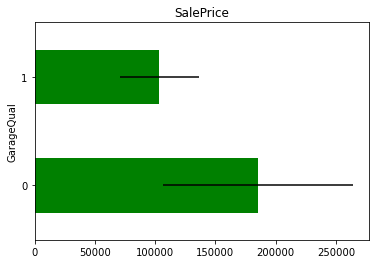

                     mean           std
GarageCond                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


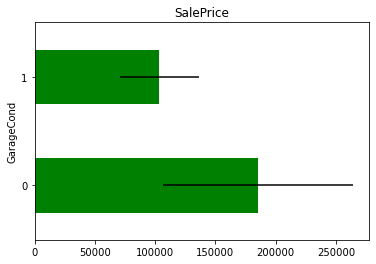

                 mean            std
PoolQC                              
0       288138.571429  206071.850935
1       180404.663455   78168.872519


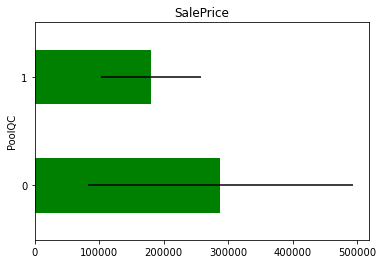

                mean           std
Fence                             
0      152912.007117  62113.736323
1      187596.837998  81656.497075


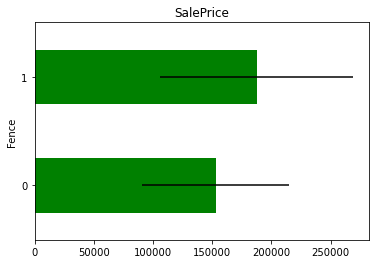

                      mean           std
MiscFeature                             
0            151623.944444  52996.542694
1            182046.410384  80084.136570


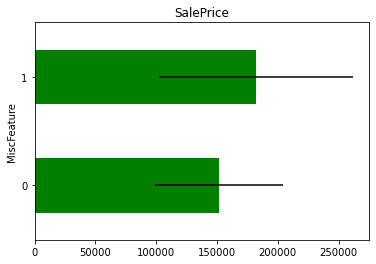

In [16]:
# Se apeleaza funcația pe fiecare varaibila cu date lipsa

for var in vars_with_na:
    analyse_na_value(data, var)

Pentru unele variabile media SalePrice unde informatia este lipsa diferă de media unde informatiile sunt prezente. Acest lucru sugereaza că datele lipsa in cazul acestor variabile sunt importante pentru predicatia SalePrice.

<a id='7'></a>
# 7. Variabile numerice

Se analizează variabielel numerice în setul de date

In [17]:
print('Numarul variabilelor numerice: ', len(num_vars))

# vizualizează variabilele numerice
data[num_vars].head()

Numarul variabilelor numerice:  35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


<a id='71'></a>
## 7.1. Variabile de timp

În setul de date se conțin 4 variabile de timp:

- YearBuilt: anul în care s-a construit casa
- YearRemodAdd: anum în care casa a fost remodelata
- GarageYrBlt: anul în care a fost construit garajul
- YrSold: anul în care casa a fost vândută

În general datele de timp nu se utilizeză în forma lor brută ci se extrage infromația din acestea, de exemplu diferența dite anul construciei si anul vanzarii.

In [18]:
# lista variabilelor ce contin informatie despre ani

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
# explorarea valorilor unice a variabilelor de timp

for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

Deci aceste variabile contin doar date sub forma de ani.

Se poate vizualiza evolutia pretului în functie de anul vanzarii

Text(0, 0.5, 'Pretul mediu')

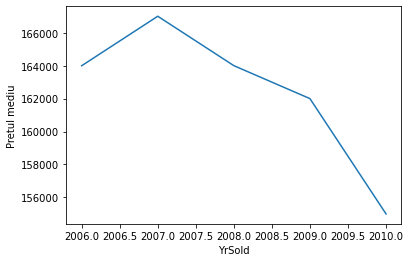

In [20]:
# graficul pretului mediu in functie de anul vanzarii

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Pretul mediu')

Se observă că odată cu trecerea timpului pretul mediu scade.

Se examineaza pretul mediu in functie de anul constructiei


Text(0, 0.5, 'Pretul mediu')

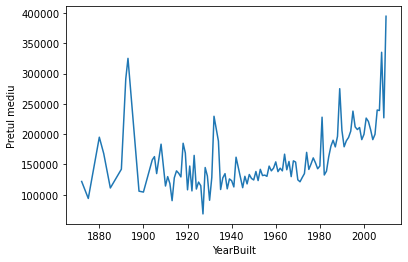

In [21]:
# graficul pretului mediu in functie de anul constructiei

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Pretul mediu')

Se observă că casele construite mai recent tind sa fie mai scumpe.

Se analizează evolutia pretului casei in functie de valorile de timp - anul vanzarii. Pentru aceasta se elaboraza o functie analuse_year_vars()

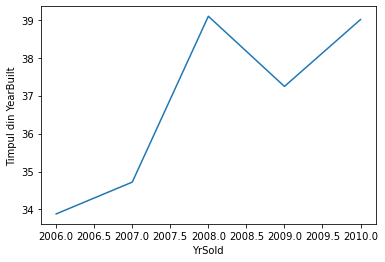

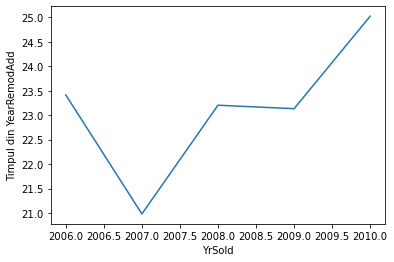

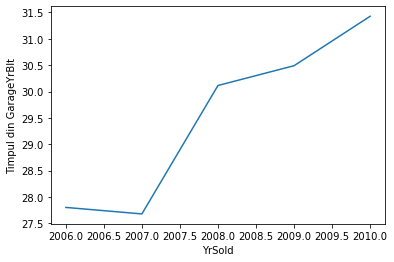

In [22]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # deteminarea diferntei dintre variabila de timp si anul vanzari
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].mean().plot()
    plt.ylabel('Timpul din ' + var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

Din grafice, vedem că spre 2010, casele vândute aveau garaje mai vechi și nu fuseseră remodelate recent, ceea ce ar putea explica de ce vedem prețuri de vânzare mai ieftine în ultimii ani în acest set de date.


Analiza evolutie pretului in functie dediferenta dintre anul vanzarii și variabilele de timp. Pentru aceasta se creaza functia analyse_year_vars()  

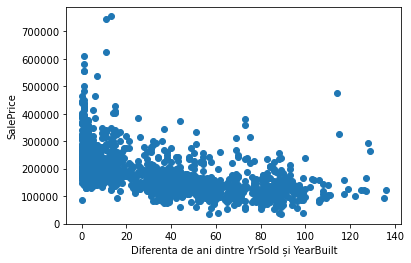

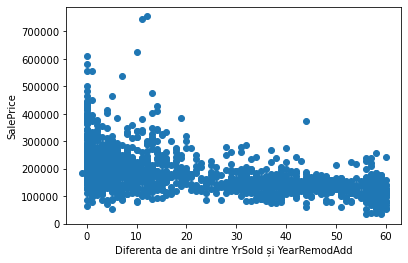

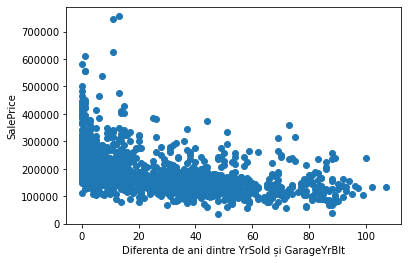

In [23]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    # deteminarea diferntei dintre variabila de timp si anul vanzari
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel('Diferenta de ani dintre YrSold și '+ var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

Se observa o tendinta de descrestere a pretului odata cu invechirea casei 

<a id='72'></a>
## 7.2. Variabile discrete

Se determina care variabile numerice sunt discrete, adică au un set finit de valori

In [24]:
#  se creazao lista a variabileor cea u mai putin de 20 de valori unice
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]


print('Numarul de variabile discrete: ', len(discrete_vars))

Numarul de variabile discrete:  13


In [25]:
# vizualizarea acestor variabile

data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


Aceste valori tind sa fie calificatori (Qual) sau scari gradate(Cond), sau se referă la numarul de odai sau unitati (FullBath, GarageCars), sau indica aria odaii (KitchenAbvGr).

În acest cas cu cat numarul este mai mare cuatat și pretul este mai mare.

Se analizeza contributia cestor variabile asupra pretului.

MoSold este luna în care casa a fost vanduta.

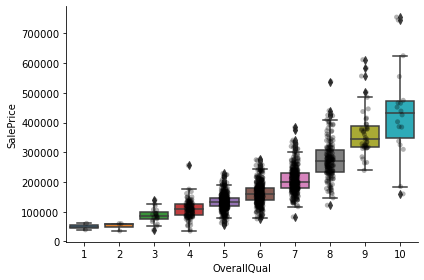

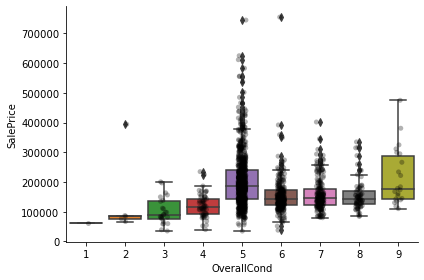

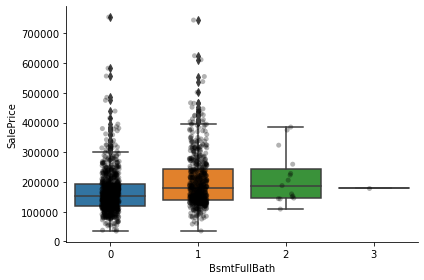

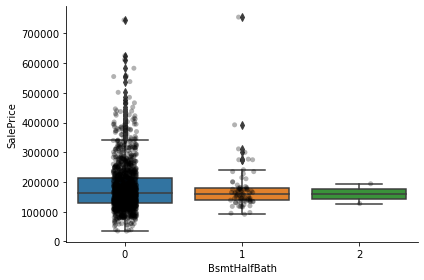

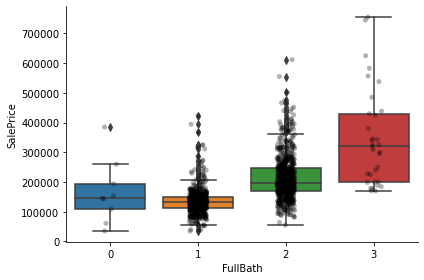

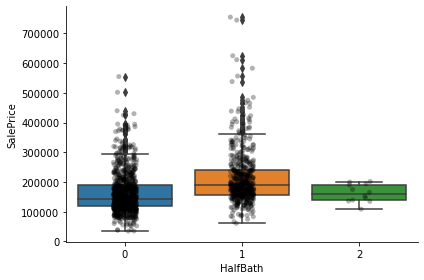

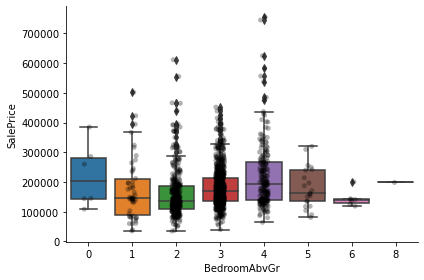

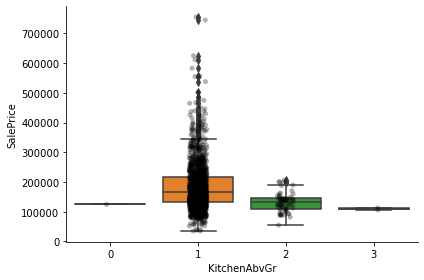

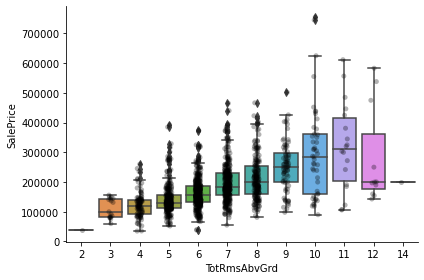

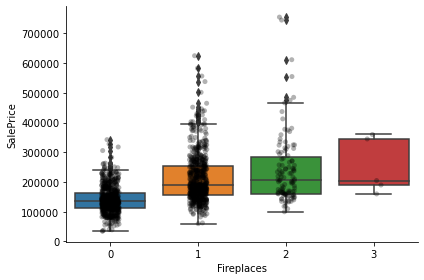

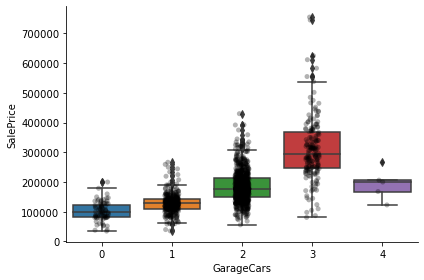

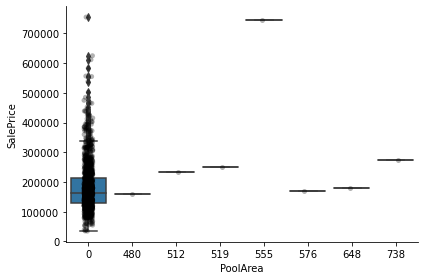

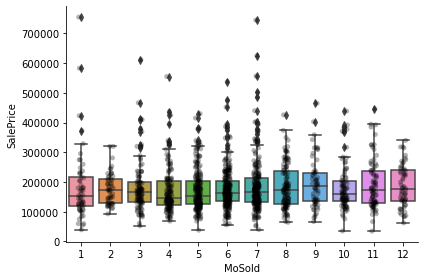

In [26]:
for var in discrete_vars:
    # se construiesc grafice boxplot cu Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # se adauga punctele datelor cu stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Pentru majoritatea varibileor numerice se observa o crestere a pretului cu cresterea valorilor acesteia.

Unele variabile insa nu au acesta tendinta de aceea se poate considera ca acestea nu au o influentă semnificativa asupra predictiei pretului

<a id='73'></a>
## 7.3. Variabile continue

Se analizează distribuție variabielor continue. variabiele continue se vor considera variabiele numerice ce nu sunt de timp si nu sunt discrete.

In [27]:
# lista variabielor continue
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Numarul variabielor continue: ', len(cont_vars))

Numarul variabielor continue:  18


In [28]:
# vizualizarea variabileor continue

data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


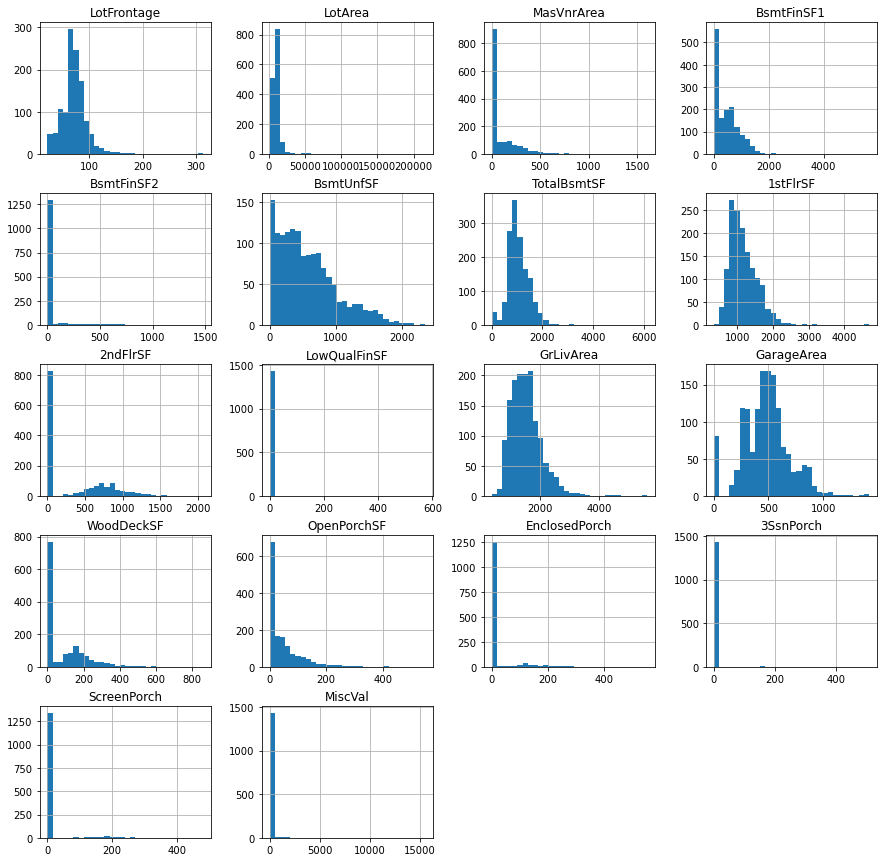

In [29]:
# hiztorama tutror variabielor continue

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Variabile continue nu sunt distribuite normal și sunt unele variabile extrem de deformate cum ar fi 3SsnPorch, ScreenPorch si MiscVal.

Uneori, transformarea variabielor cu scopul de a îmbunatăți distribuția acestora poate avea efect asupra îmbunatățiri performantelor modelului.

Asupra variabilelor cu distribuții mai putin deformate, de exemplu LotFrontage, LotArea, BsmUnfSF, se poate aplica transformarea Yeo-Johnson, iar pentru cele puternic deformate, de exemplu  3SsnPorch, ScreenPorch si MiscVal, transformarea binară



In [30]:
# lista variabielor puternic deformate

deformate = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [31]:
# lista variabielor putin deformate

cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

<a id='731'></a>
### 7.3.1. Tranformarea Yeo-Johnson 

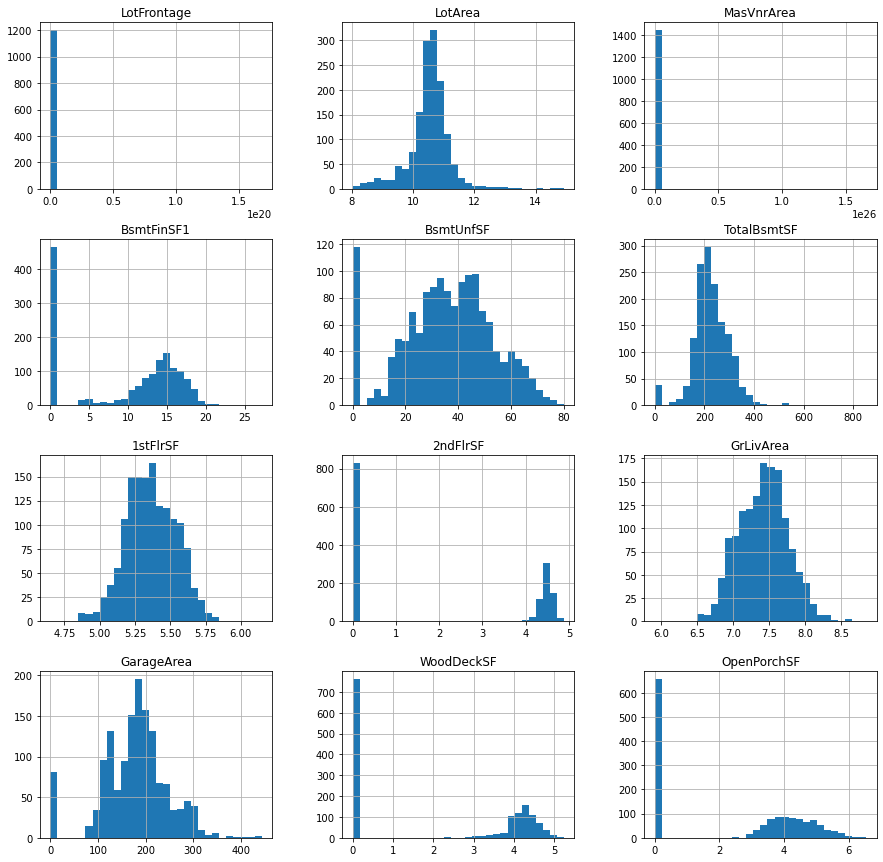

In [32]:
# Analiza distribuție variabilelor mai putin deformate inainte de transformare și dupa 

tmp = data.copy()

for var in cont_vars:

    # transformarea yeo-johsnon a variabielor
    tmp[var], param = stats.yeojohnson(data[var])

    
# histogramele variabielor transformate
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

Pentru LotFrontage și MasVnrArea transformarea nu a înbunatatit distributia însă pentru celelalte valorile par a fi distribuite mai uniform în interval. 

Dacă acest lucru ajută la îmbunătățirea predicției, rămâne de văzut. Pentru a determina dacă acesta se întâmplă, ar trebui să realizam training-ul unui model cu valorile originale și unui alt model cu valorile transformate și să determinăm performanța modelului și importanța caracteristicilor.

În continuare se vor explora variabile continue si influenta acestora asupra pretului

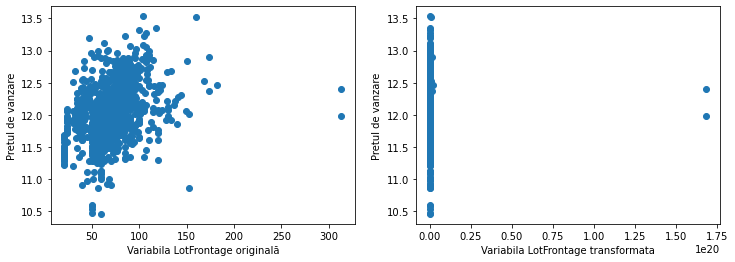

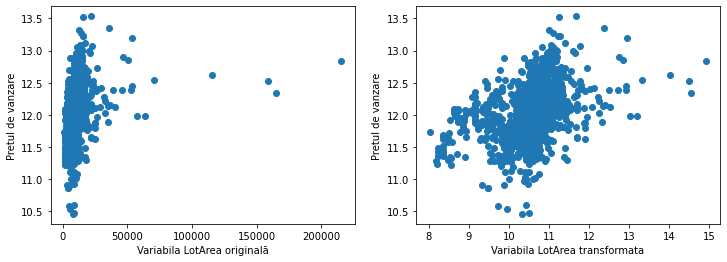

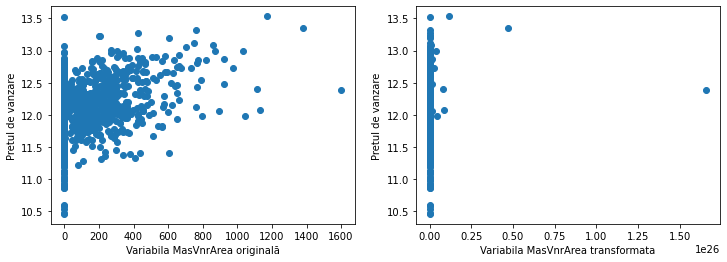

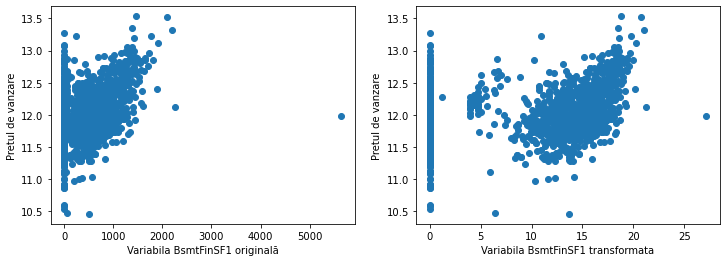

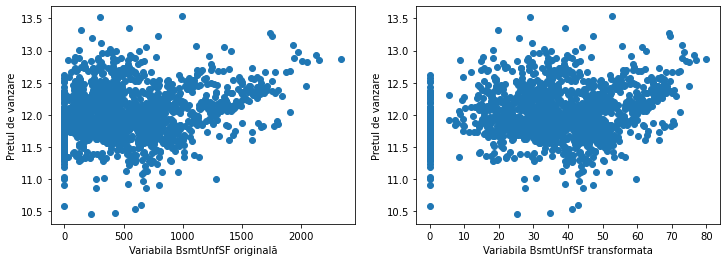

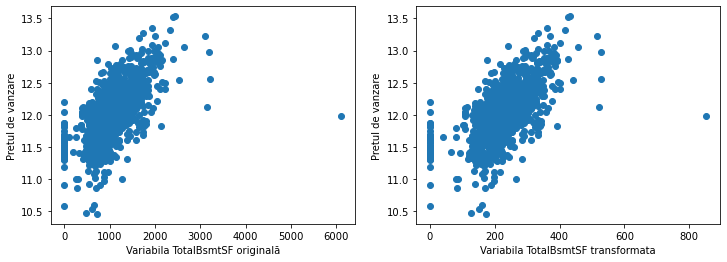

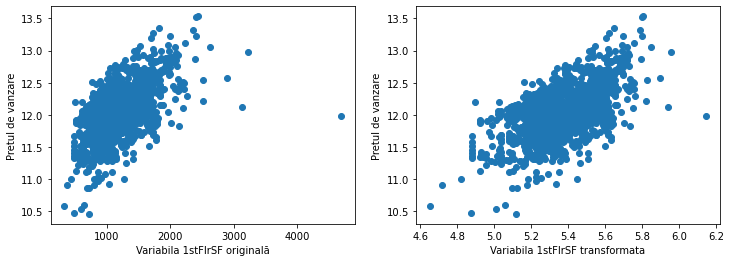

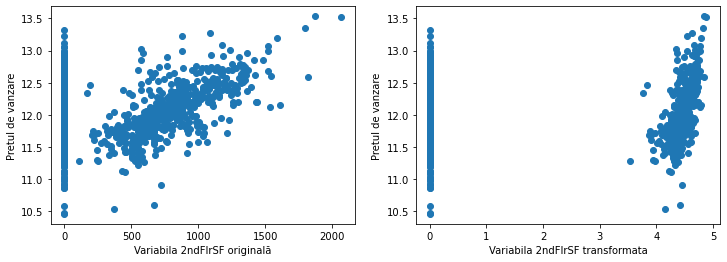

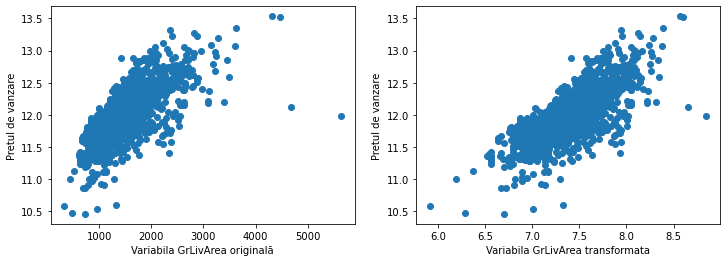

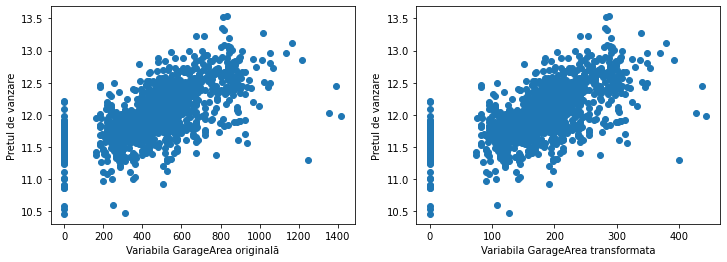

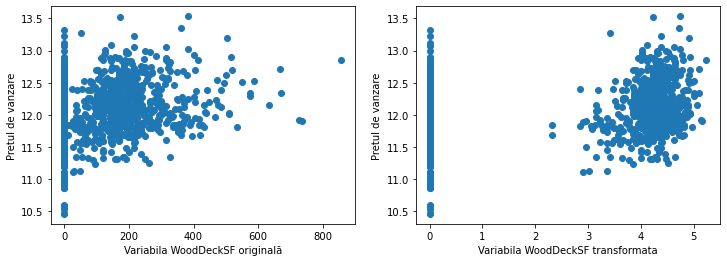

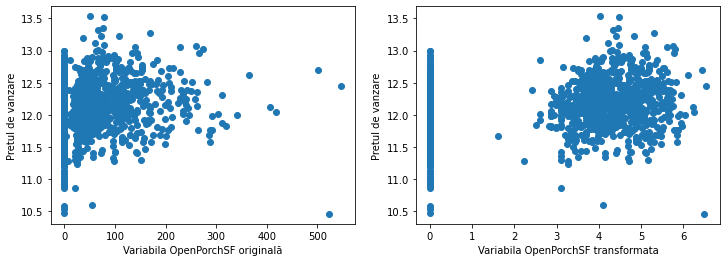

In [33]:
# Graficele preturilor în functie de variabile originale si cele transformate

for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # graficul pretului vs vraivila originala    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Pretul de vanzare')
    plt.xlabel('Variabila ' + var + ' originală')

    #graficul pretului vs vraivila originala
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Pretul de vanzare')
    plt.xlabel('Variabila ' + var + ' transformata')
                
    plt.show()

Vizual, transformarea a inbunatatit doar dependenta pretului de variabile LotArea.

Se încearca utilizarea altor transformari

Multe dintre variabile contin valoarea 0 de aceea asupra lor nu se poate aplica transforamrea algoritmica, însă aceasta transformare poate fi aplicata aupra variabilelor:

 ["LotFrontage", "1stFlrSF", "GrLivArea"]

 
 <a id='732'></a>
 ### 7.3.2.Transformarea logaritmica

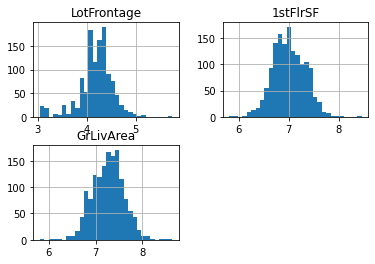

In [34]:
# Analiza distributiei variabielor "LotFrontage", "1stFlrSF", "GrLivArea" dupa transformarea logaritmica

tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:

    # transforamrea logaritmica a variabielor
    tmp[var] = np.log(data[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

Acum distribuția acestora este mai apropiat de distributia Gaussian.

În continuare se analiza influenta acestora variabile asupra pretului

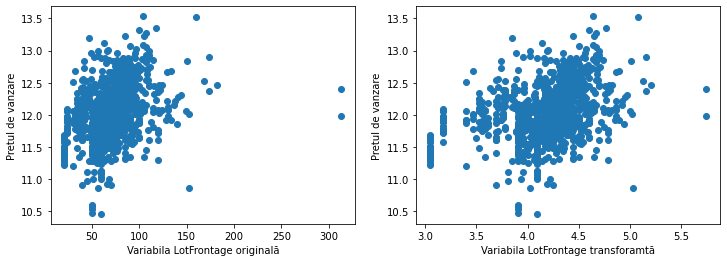

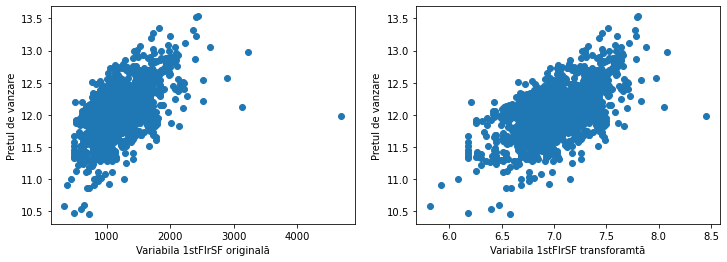

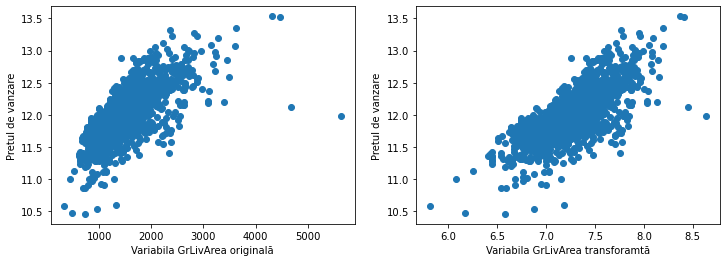

In [35]:
# Graficele preturilor în functie de variabile originale si cele transformate

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # graficul pretului vs variabila originala    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Pretul de vanzare')
    plt.xlabel('Variabila ' + var + ' originală')

    # graficul pretului vs variabila transformata
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Pretul de vanzare')
    plt.xlabel('Variabila ' + var + ' transforamtă')
                
    plt.show()

Variabilele transforamte au o distribuțiea mai buna a valorilor, ceea ce înseamnă ca pot asigura o predictei mai buna.

<a id='733'></a>
### 7.3.3. Transformarea binară

Asupra variabilelor cu distributie puternic deformat se poatre aplica transforamrea binara

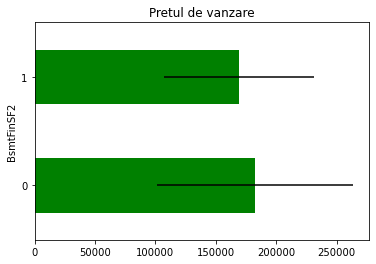

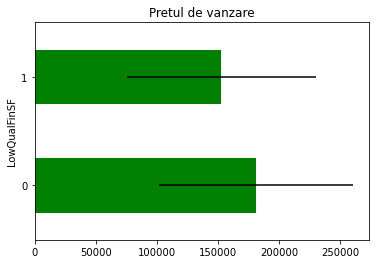

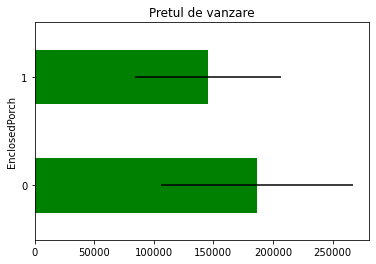

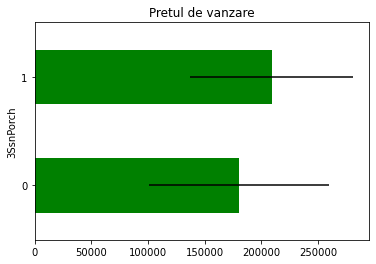

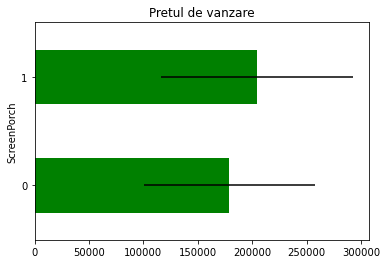

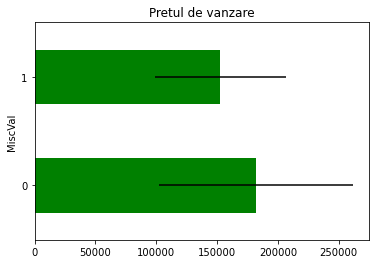

In [36]:
for var in deformate:
    
    tmp = data.copy()
    
    # se substituie valorile diferite de 0 cu valoarea 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    
    # se detemina valorile medii a pretului pentru gruprile cu valor 0 si 1
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # se elaborează graficul bar
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Pretul de vanzare", color='green')

    plt.show()

Se pare că există o diferență în prețul de vânzare pentru grupurile 0 si 1, dar intervalele de încredere se suprapun, așa că cel mai probabil acest lucru nu este semnificativ pentru predictie.

<a id='8'></a>
# 8. Variabile categoriale


In [37]:
print('Numarul variabilelor categoriale: ', len(cat_vars))

Numarul variabilelor categoriale:  44


In [38]:
# Vizualizara ariabielor categoriale
data[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


<a id='81'></a>
## 8.1. Numarul de valori: cardinalitatea

Se analizează numarul de valori unice prezente pentu fiecare varibila

<AxesSubplot:>

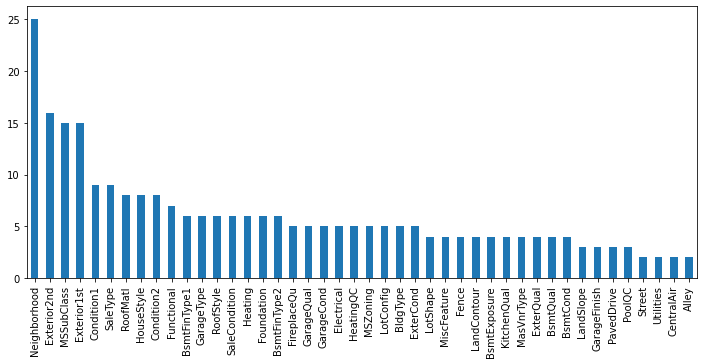

In [39]:
# se detemina numarul de valori unice se aranjeaza in ordine descrescatoare si se afiseza grafic

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

Toate variabilele categoriale prezintă cardinalitate scăzută, ceea ce înseamnă că au puține valori diferite.

<a id='82'></a>
## 8.2. Variabile de calitate

O serie de variabile care se referă la calitatea unui aspect al casei, de exemplu garajul, sau gardul sau bucătăria. Se vor înlocui aceste categorii cu numere a căror valoare crește îdată cu creștera calității locului sau a camerei.

Confrom descrierii de pe site-ul Kaggle aceste variabile utilizează calificativele, de exemplu:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

In [40]:
# maparea calificativelor cu valori numerice

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    data[var] = data[var].map(qual_mappings)

In [41]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [42]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [43]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [44]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [45]:
# includera tuturor acestor variabile cu valori mapate într-o lista

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

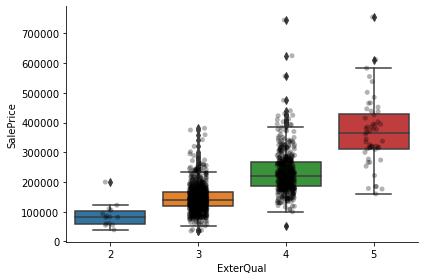

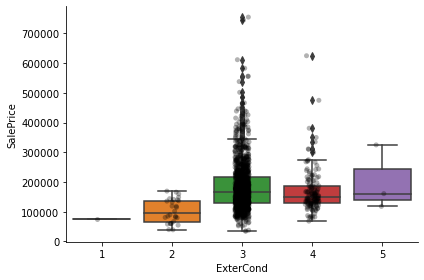

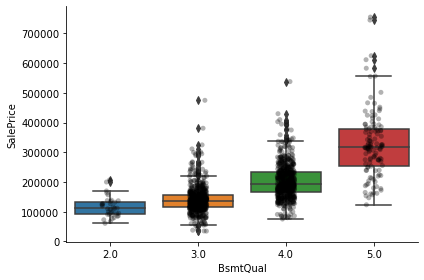

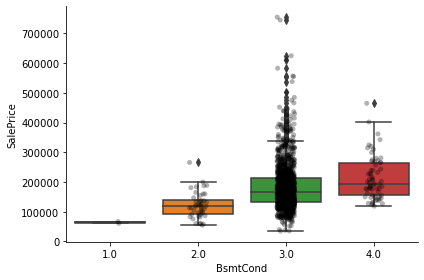

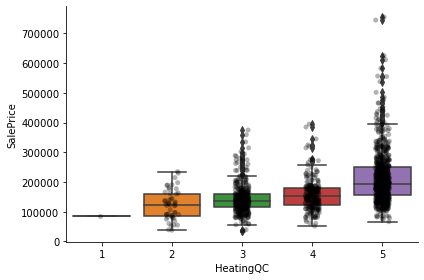

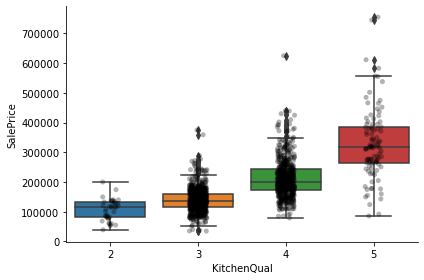

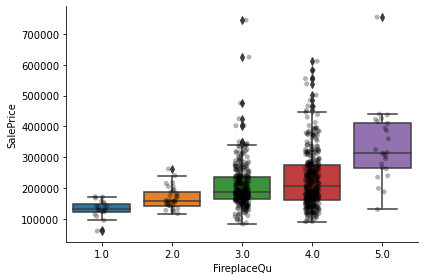

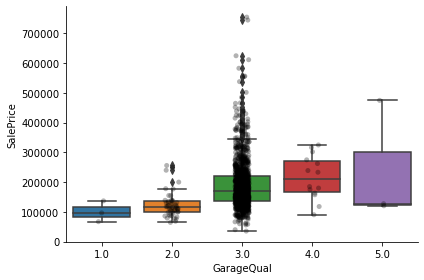

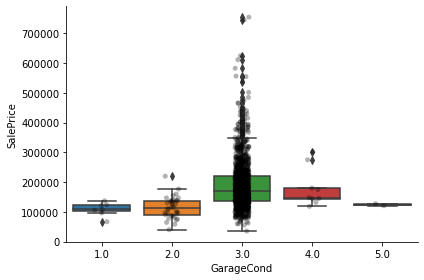

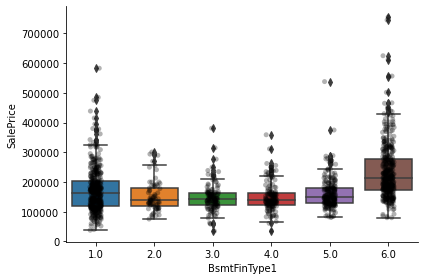

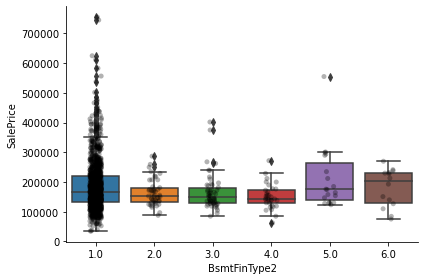

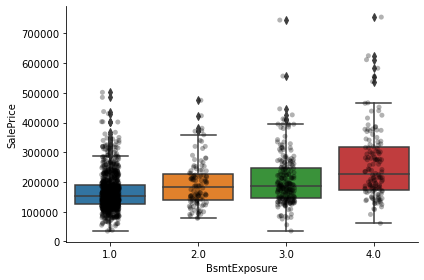

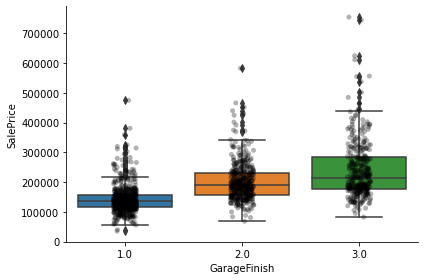

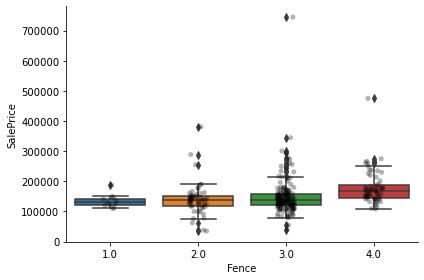

In [46]:
# Graficele dependetei pretului caselor de valorile numerice de calitate fiecarei variabile

for var in qual_vars:
    # elaborarea boxplot cu Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # adaugarea punctelor datelor cu stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Pentru majoritatea variabilelor, pretul creste odată cu crestera valorii calității.

In [47]:
# listarea celorlate variabile categoriale

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

<a id='83'></a>
## 8.3. Variabile cu valori rare

Se analizează variabliele categorile care au preponderent o valoarea unica și doar câteva valor diferite de acea valoare. Pentru detectra acestor variabile în setul de date se creaza o fuctie analyse_rare_labels()

In [48]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # se determina procentaju fiecarei valori a varibilelor 
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # se returneaza variabilele rare
    return tmp[tmp < rare_perc]

# se prprinteaza variabilel care au valori cu o ponde sub 1%

for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Unele dintre variabilele categoriale prezintă mai multe valori care sunt prezente în mai puțin de 1% din case.

Valorile care sunt subreprezentate în setul de date tind să cauzeze evectul over-fitting în modelele machine learning, de aceea acestea se doresc a se elimina. 

în continuare se vor analiza influentele variabilelor categorilae fără cele de calitate asupra pretului

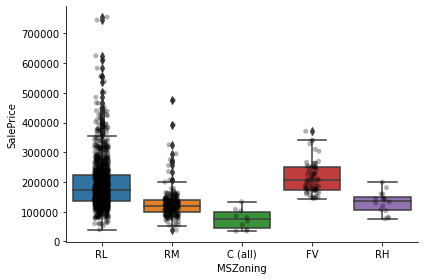

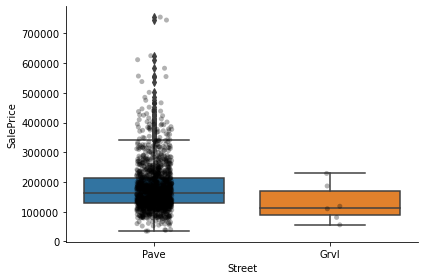

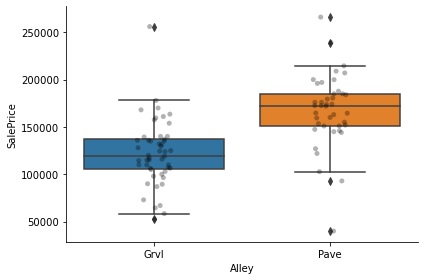

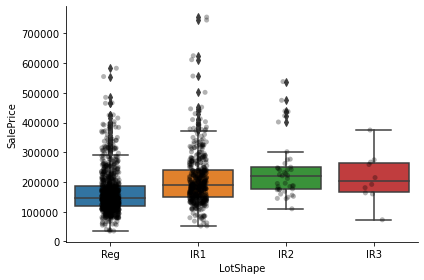

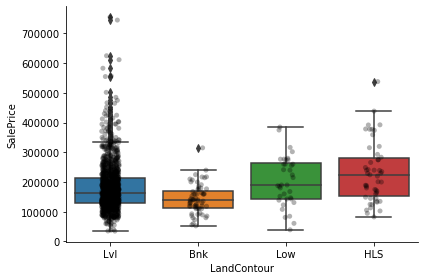

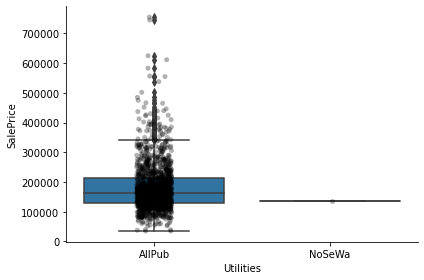

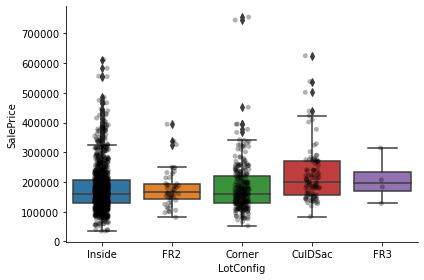

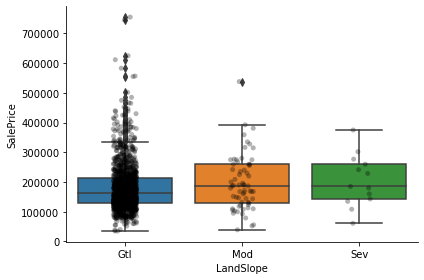

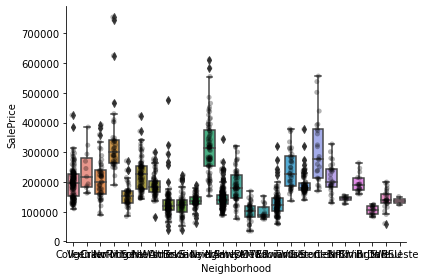

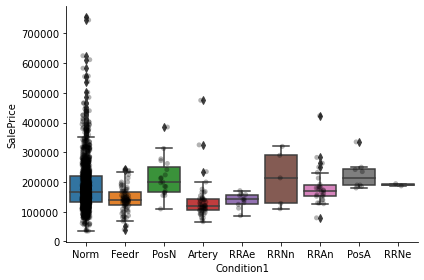

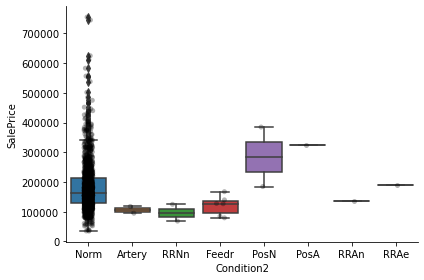

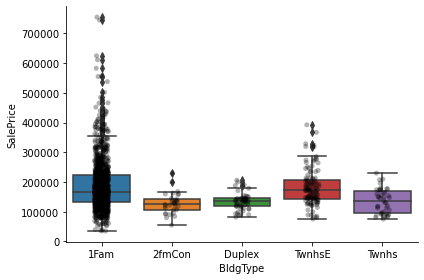

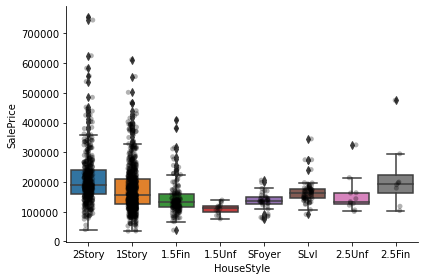

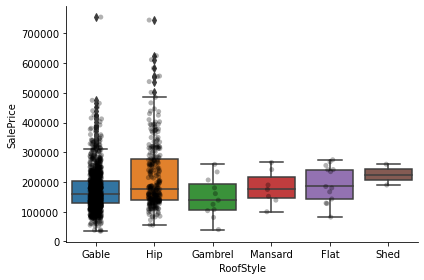

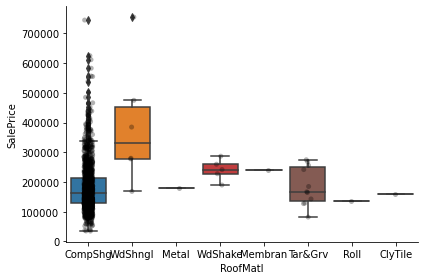

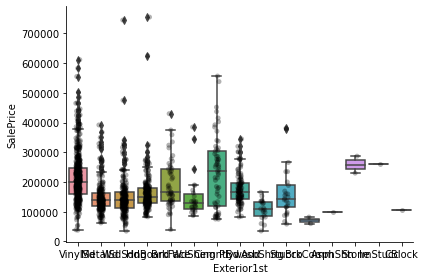

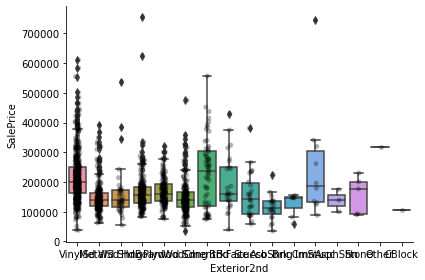

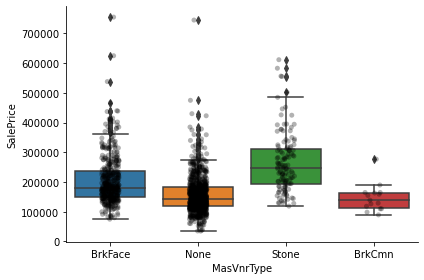

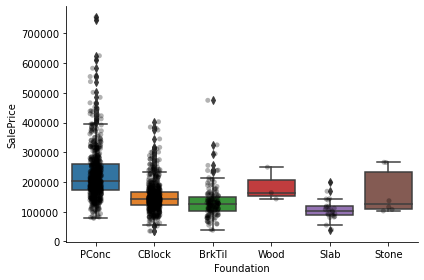

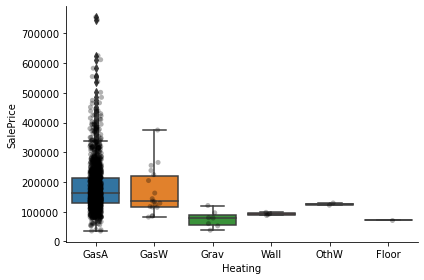

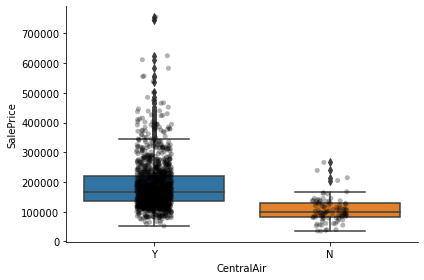

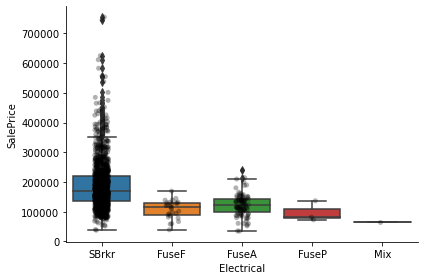

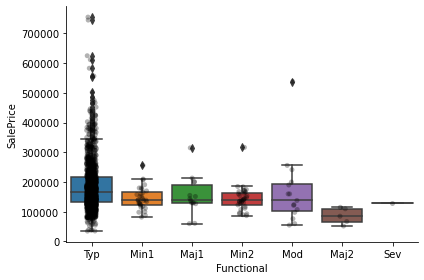

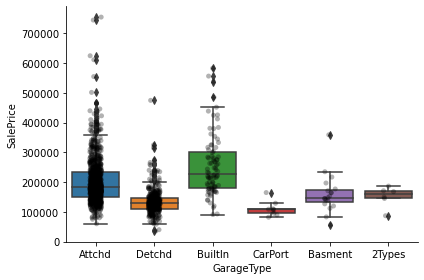

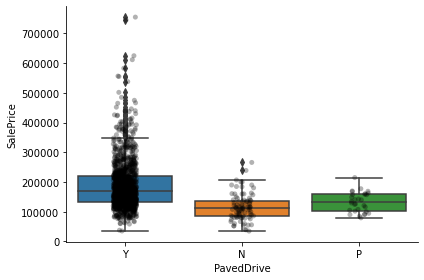

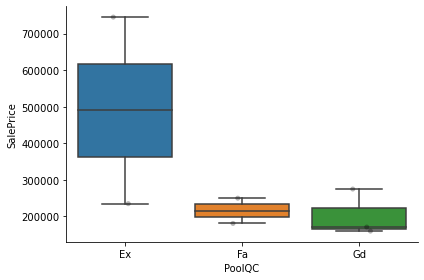

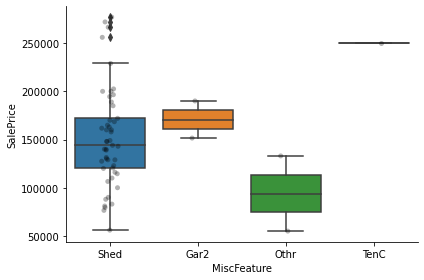

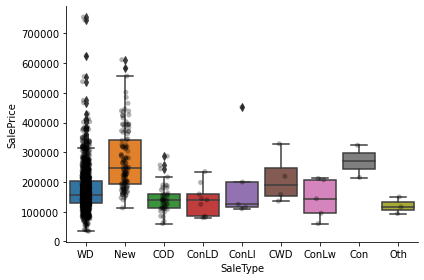

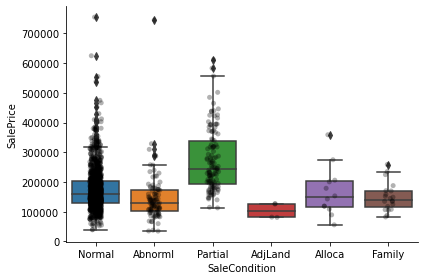

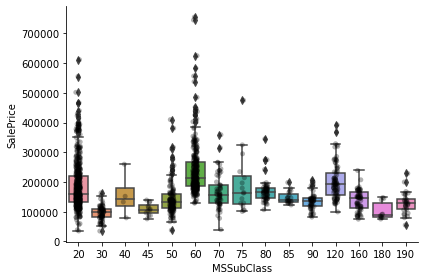

In [49]:
# Graficele dependetei pretului caselor de valorile varibailor categoriale
for var in cat_others:
    # graficul boxplot cu Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # adaugarea punctelor datelor cu stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

În mod clar, categoriile oferă informații despre prețul de vânzare, deoarece diferitele categorii arată prețuri medii de vânzare diferite.